In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

In [32]:
data = pd.read_csv("C:/Users/mandujoayo/인공지능개론/과제/230512/car.data", index_col = None, header = None)

In [33]:
data

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [34]:
data.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [36]:
data.isnull()

,0,1,2,3,4,5,6
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False
1726,False,False,False,False,False,False,False


In [37]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [38]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

<AxesSubplot:xlabel='6', ylabel='count'>

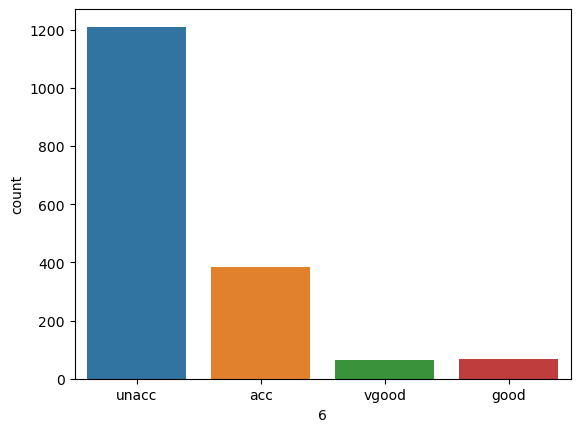

In [39]:
sns.countplot(data = data, x=data[6])

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [41]:
data

,0,1,2,3,4,5,6
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [42]:
X = data.iloc[:,0:6].values
y = data.iloc[:,6].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [51]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(100,input_shape=(6,),activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               700       
                                                                 
 dense_29 (Dense)            (None, 80)                8080      
                                                                 
 dense_30 (Dense)            (None, 60)                4860      
                                                                 
 dense_31 (Dense)            (None, 4)                 244       
                                                                 
Total params: 13,884
Trainable params: 13,884
Non-trainable params: 0
_________________________________________________________________


C:\Users\mandujoayo\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [52]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.7424 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 2/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0159 - accuracy: 0.9964 - val_loss: 6.8599e-04 - val_accuracy: 1.0000
Epoch 3/100
44/44 [==============================] - 0s 1ms/step - loss: 1.7085e-04 - accuracy: 1.0000 - val_loss: 7.5040e-05 - val_accuracy: 1.0000
Epoch 4/100
44/44 [==============================] - 0s 1ms/step - loss: 6.6203e-05 - accuracy: 1.0000 - val_loss: 5.5916e-05 - val_accuracy: 1.0000
Epoch 5/100
44/44 [==============================] - 0s 1ms/step - loss: 5.1810e-05 - accuracy: 1.0000 - val_loss: 4.4704e-05 - val_accuracy: 1.0000
Epoch 6/100
44/44 [==============================] - 0s 1ms/step - loss: 4.2260e-05 - accuracy: 1.0000 - val_loss: 3.6296e-05 - val_accuracy: 1.0000
Epoch 7/100
44/44 [==============================] - 0s 1ms/step - loss: 3.4962e-05 - accuracy: 1.0000 - val_loss: 3.0

Epoch 56/100
44/44 [==============================] - 0s 1ms/step - loss: 1.5406e-07 - accuracy: 1.0000 - val_loss: 1.3092e-07 - val_accuracy: 1.0000
Epoch 57/100
44/44 [==============================] - 0s 1ms/step - loss: 1.4560e-07 - accuracy: 1.0000 - val_loss: 1.2541e-07 - val_accuracy: 1.0000
Epoch 58/100
44/44 [==============================] - 0s 1ms/step - loss: 1.4405e-07 - accuracy: 1.0000 - val_loss: 1.2059e-07 - val_accuracy: 1.0000
Epoch 59/100
44/44 [==============================] - 0s 1ms/step - loss: 1.3870e-07 - accuracy: 1.0000 - val_loss: 1.1473e-07 - val_accuracy: 1.0000
Epoch 60/100
44/44 [==============================] - 0s 1ms/step - loss: 1.3405e-07 - accuracy: 1.0000 - val_loss: 1.0991e-07 - val_accuracy: 1.0000
Epoch 61/100
44/44 [==============================] - 0s 1ms/step - loss: 1.2602e-07 - accuracy: 1.0000 - val_loss: 1.0715e-07 - val_accuracy: 1.0000
Epoch 62/100
44/44 [==============================] - 0s 1ms/step - loss: 1.2206e-07 - accuracy: 1.0

In [53]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 836us/step - loss: 3.3075e-08 - accuracy: 1.0000


[3.3075401972837426e-08, 1.0]

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        85

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346

[[83  0  0  0]
 [ 0 87  0  0]
 [ 0  0 91  0]
 [ 0  0  0 85]]
